In [1]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer # used for handling missing data

In [2]:
import time

# Load data

In [3]:
df = pd.read_excel("satisfaction.xlsx")

In [4]:
df.head(1)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0


In [5]:
#df[(df.satisfaction_v2=="satisfied")&(df["Customer Type"]!="disloyal Customer")].shape[0]

In [6]:
#df[(df.satisfaction_v2=="neutral or dissatisfied")&(df["Customer Type"]!="disloyal Customer")].shape[0]

In [7]:
df.shape

(129880, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
id                                   129880 non-null int64
satisfaction_v2                      129880 non-null object
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Seat comfort                         129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Food and drink                       129880 non-null int64
Gate location                        129880 non-null int64
Inflight wifi service                129880 non-null int64
Inflight entertainment               129880 non-null int64
Online support                       129880 non-null int64

# Data Understanding

In [9]:
df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
df.satisfaction_v2.unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [11]:
df.satisfaction_v2.describe()

count        129880
unique            2
top       satisfied
freq          71087
Name: satisfaction_v2, dtype: object

In [12]:
df.describe(include="O")

,satisfaction_v2,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [13]:
df["Arrival Delay in Minutes"].isnull().any()

True

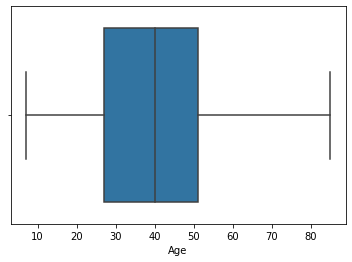

In [14]:
sns.boxplot(df["Age"])
plt.show()

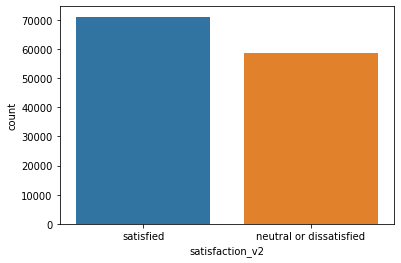

In [15]:
sns.countplot("satisfaction_v2", data = df)

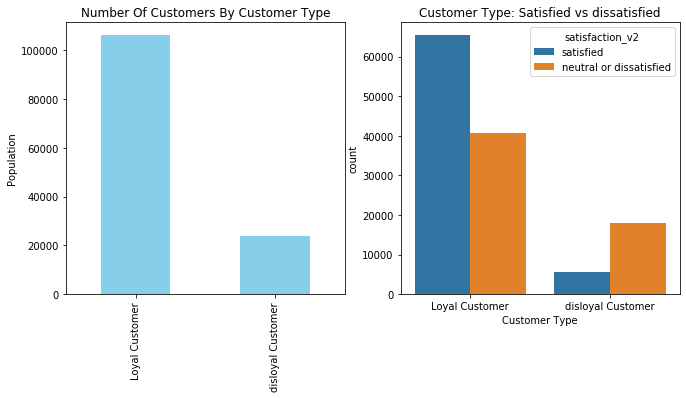

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (11, 5))
df["Customer Type"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Customers By Customer Type")
ax[0].set_ylabel("Population")
sns.countplot("Customer Type", hue = "satisfaction_v2", data = df, ax = ax[1])
ax[1].set_title("Customer Type: Satisfied vs dissatisfied")
plt.show()

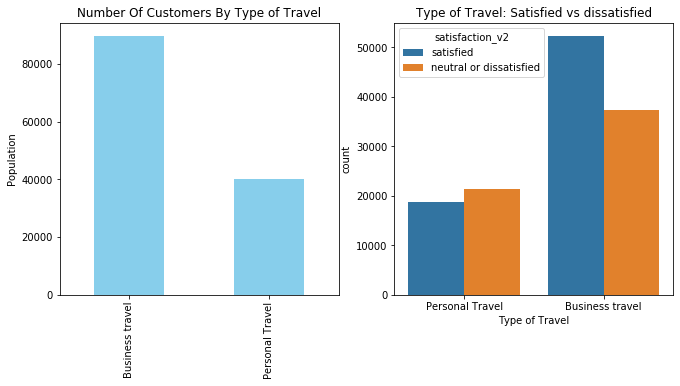

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (11, 5))
df["Type of Travel"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Customers By Type of Travel")
ax[0].set_ylabel("Population")
sns.countplot("Type of Travel", hue = "satisfaction_v2", data = df, ax = ax[1])
ax[1].set_title("Type of Travel: Satisfied vs dissatisfied")
plt.show()

In [18]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [19]:
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df["satisfaction_v2"] = le.fit_transform(df["satisfaction_v2"])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


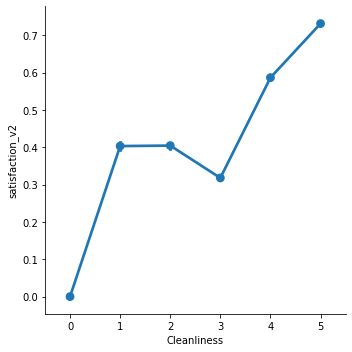

In [20]:
sns.factorplot("Cleanliness", "satisfaction_v2", data = df)

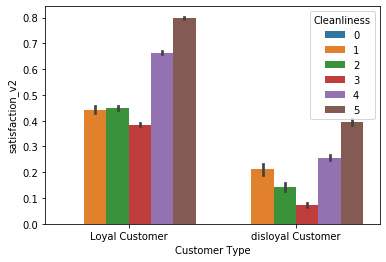

In [21]:
sns.barplot(x = "Customer Type", y = "satisfaction_v2", hue = "Cleanliness", data = df)
plt.show()

# Data preprocessing

### By doing a stratified split we keep the same proportion between classes. This split better represent the original data and will possibli reduce any bias.

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['satisfaction_v2']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

## Label Encoding

In [23]:
categorical_features = df.describe(include="O").columns.tolist()
df[categorical_features].head(3)

,Gender,Customer Type,Type of Travel,Class
0,Female,Loyal Customer,Personal Travel,Eco
1,Male,Loyal Customer,Personal Travel,Business
2,Female,Loyal Customer,Personal Travel,Eco


In [24]:
categorical_features = strat_train_set.describe(include="O").columns.tolist()
print(categorical_features)

# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical features 
strat_train_set[categorical_features] = strat_train_set[categorical_features].apply(lambda col: le.fit_transform(col))
strat_train_set[categorical_features].head(3)

['Gender', 'Customer Type', 'Type of Travel', 'Class']


,Gender,Customer Type,Type of Travel,Class
43835,0,1,0,1
46917,1,1,0,1
82684,1,0,0,1


### Handling the missing data

In [25]:
df["Arrival Delay in Minutes"].isnull().any()

True

In [26]:
strat_train_set["Arrival Delay in Minutes"].mean()

15.099801112226771

In [27]:
# handling the missing data and replace missing values with nan from numpy and replace with mean of all the other values
imputer = SimpleImputer(missing_values=float('nan'), strategy='mean')
imputer = imputer.fit(strat_train_set[["Arrival Delay in Minutes"]])
strat_train_set["Arrival Delay in Minutes"] = imputer.transform(strat_train_set[["Arrival Delay in Minutes"]])

### Drop id column

In [28]:
strat_train_set = strat_train_set.drop("id",axis=1)

In [29]:
X = strat_train_set.drop("satisfaction_v2", axis=1)
y = strat_train_set['satisfaction_v2']

# Normalization

In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_corr = sc_X.fit_transform(X)

X = pd.DataFrame(X_train_corr, index=X.index, columns=X.columns)

In [31]:
X[X["Arrival Delay in Minutes"] != X["Arrival Delay in Minutes"]]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes


## Feature selection

#### select those features that have the strongest relationship with the output variable.

/home/emna/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.05427569 0.07689455 0.02089082 0.04518799 0.04143235 0.01917297
 0.14312076 0.0310866  0.035127   0.0229891  0.01657719 0.11970433
 0.06190043 0.08808336 0.02679363 0.03823832 0.0283333  0.03566534
 0.04038323 0.02761049 0.01288633 0.01364621]


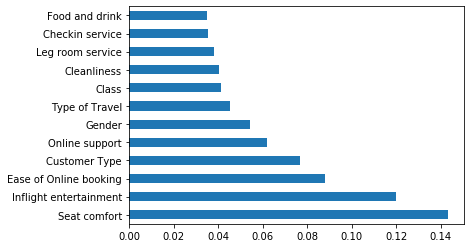

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### Correlation identifies which features are most related to the target variable,.
### we will plot heatmap of correlated features using the seaborn library.

In [33]:
for_corr = pd.concat([X,y],axis=1)

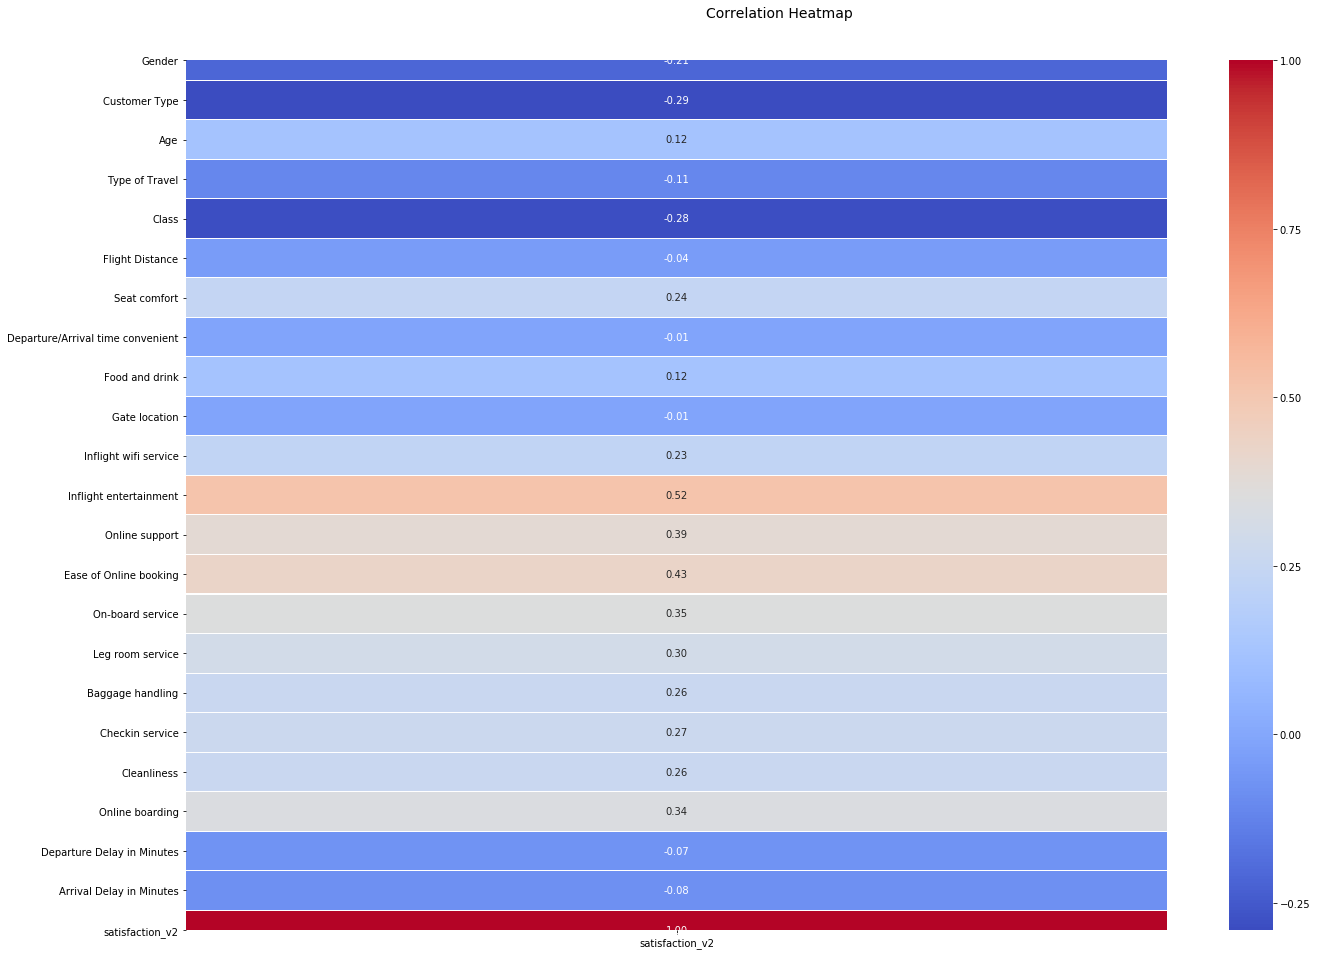

In [34]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(22, 15))
corr = for_corr.corr()
hm = sns.heatmap(round(corr[["satisfaction_v2"]],2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

#### Departure Delay in Minutes and Arrival Delay in Minutes are very positively correlated (+0.96)
#### ==> we should remove one of them

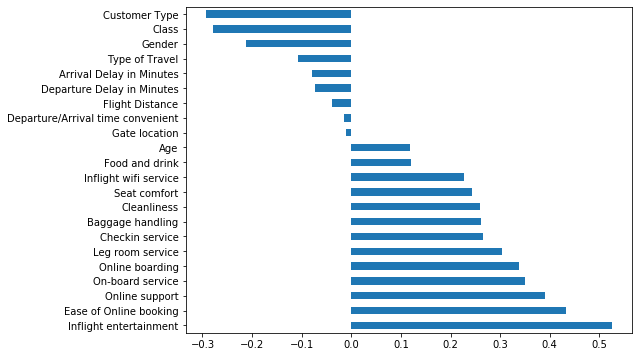

In [35]:
fig = plt.figure(figsize=(8,6))
for_corr.corr().drop("satisfaction_v2")["satisfaction_v2"].nlargest(22).plot(kind='barh')
plt.show()

In [36]:
most_correlated_feautres = for_corr.corr().abs().drop("satisfaction_v2")["satisfaction_v2"].nlargest(13).index.tolist()
most_correlated_feautres.append("Arrival Delay in Minutes") 
print(most_correlated_feautres)

['Inflight entertainment', 'Ease of Online booking', 'Online support', 'On-board service', 'Online boarding', 'Leg room service', 'Customer Type', 'Class', 'Checkin service', 'Baggage handling', 'Cleanliness', 'Seat comfort', 'Inflight wifi service', 'Arrival Delay in Minutes']


In [37]:
X = X[most_correlated_feautres]

In [38]:
X.head(1)

,Inflight entertainment,Ease of Online booking,Online support,On-board service,Online boarding,Leg room service,Customer Type,Class,Checkin service,Baggage handling,Cleanliness,Seat comfort,Inflight wifi service,Arrival Delay in Minutes
43835,-1.029358,0.40413,0.367955,-1.938423,0.499448,1.170873,2.112961,0.654836,-1.064544,-0.600037,-0.611482,-1.32072,0.569745,-0.389194


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [41]:
start_time = time.process_time()
logisticRegr.fit(X, y)
execution_time = time.process_time() - start_time
print(f"Execution time {execution_time}")

/home/emna/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Execution time 0.307748550999996


## Training accuracy

In [42]:
logisticRegr.score(X,y)

0.8179569602710194

# Test

In [43]:
most_correlated_feautres.append("satisfaction_v2")
strat_test_set = strat_test_set[most_correlated_feautres]
categorical_features = strat_test_set.describe(include="O").columns.tolist()
print(categorical_features)

# apply le on categorical features 
strat_test_set[categorical_features] = strat_test_set[categorical_features].apply(lambda col: le.fit_transform(col))
# handling the missing data and replace missing values with nan from numpy and replace with mean of all the other values
imputer = SimpleImputer(missing_values=float('nan'), strategy='mean')
imputer = imputer.fit(strat_test_set[["Arrival Delay in Minutes"]])
strat_test_set["Arrival Delay in Minutes"] = imputer.transform(strat_test_set[["Arrival Delay in Minutes"]])
X_test = strat_test_set.drop("satisfaction_v2", axis=1)
y_test = strat_test_set['satisfaction_v2']

['Customer Type', 'Class']


In [44]:
predicted=list()
reality=list()
i = 10
predicted = logisticRegr.predict(X_test.iloc[:10])
reality = y_test.iloc[:10].values

In [45]:
predicted

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [46]:
reality

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1])

## Testing accuracy

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
y_pred_log=logisticRegr.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred_log)

0.5789959963042809

In [50]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [51]:
# In binary and multiclass classification, this function is equivalent to the accuracy_score
jaccard_similarity_score(y_test, y_pred_log,normalize=True)

/home/emna/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5789959963042809

In [52]:
f1_score(y_test, y_pred_log)

0.7084044368600683

In [53]:
log_loss(y_test, y_pred_log)

14.541271058971262

### Confusion Matrix Evaluation Metrics - Logistic regression

In [54]:
cnf_matrix_log = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix_log

array([[ 1756, 10003],
       [  933, 13284]])

In [55]:
TN1 = cnf_matrix_log[0][0]
FP1 = cnf_matrix_log[0][1]
TP1 = cnf_matrix_log[1][1]
FN1 = cnf_matrix_log[1][0]

Text(0.5, 257.44, 'Predicted label')

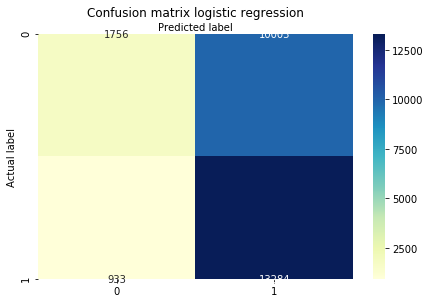

In [56]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## PRECISION : how many selected items are correct


### TP/ ( TP + FP )

In [57]:
TP1/(TP1+FP1)

0.5704470305320565

## RECALL : how many correct items were selected


### TP/ ( TP + FN )

In [58]:
TP1/(TP1 +FN1)

0.934374340578181

# Decision tree

In [59]:
from sklearn.tree import DecisionTreeClassifier 

In [60]:
dt_model = DecisionTreeClassifier()
start_time = time.process_time()
dt_model.fit(X,y)
execution_time = time.process_time() - start_time
print(f"Execution time {execution_time}")
y_pred_dt = dt_model.predict(X_test)

Execution time 0.3928480599999986


In [61]:
y_pred_dt

array([1, 1, 1, ..., 1, 1, 1])

### Accuracy

In [62]:
dt_model.score(X,y)

0.994273560209424

In [63]:
print("Accuracy:",accuracy_score(y_test, y_pred_dt))

Accuracy: 0.5474283954419464


In [64]:
# In binary and multiclass classification, this function is equivalent to the accuracy_score
jaccard_similarity_score(y_test, y_pred_dt,normalize=True)

/home/emna/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5474283954419464

In [65]:
f1_score(y_test, y_pred_dt)

0.7022742237755154

In [66]:
log_loss(y_test, y_pred_dt)

15.631620492287649

In [67]:
cnf_matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
cnf_matrix_dt

array([[  355, 11404],
       [  352, 13865]])

In [68]:
TN = cnf_matrix_dt[0][0]
FP = cnf_matrix_dt[0][1]
TP = cnf_matrix_dt[1][1]
FN = cnf_matrix_dt[1][0]

Text(0.5, 257.44, 'Predicted label')

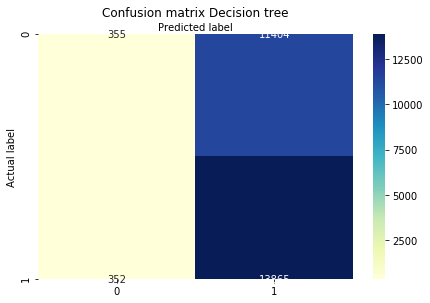

In [69]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### TP/ ( TP + FP )

In [70]:
TP/(TP+FP)

0.5486960307095651

### TP/ ( TP + FN )

In [71]:
TP/(TP+FN)

0.9752409087711894